<a href="https://colab.research.google.com/github/janpeter19/BPL_STEM_AIR_Perfusion/blob/main/BPL_STEM_AIR_Perfusion_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_STEM_AIR_Perfusion script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_STEM_AIR_Pefusion is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2024-09-11 12:22:56--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74403966 (71M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py310_23 100%[===================>]  70.96M   112MB/s    in 0.6s    

2024-09-11 12:22:57 (112 MB/s) - ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’ saved [74403966/74403966]

PREFIX=/usr/local
Unpacking payload ...
                                                                              
Installing base environment...





Preparing transaction: - \ | / - \ done
Executing transaction: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-python-1.0.9        |  py310h6a678d5_8         356 KB
    bzip2-1.0.8                |       h5eee18b_6         262 KB
    ca-certificates-2024.7.2   |       h06a4308_0         127 KB
    certifi-2024.8.30          |  py310h06a4308_0         162 KB
    cffi-1.16.0            

In [ ]:
!conda --version
!python --version

conda 23.1.0
Python 3.10.14


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

# BPL_STEM_AIR_Perfusion setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_STEM_AIR_Perfusion_linux_om_me.fmu
* Setup-file - BPL_STEM_AIR_Perfusion_explore

In [ ]:
# Filter out DepracationWarnings for 'np.float as alias' is needed - wish I could make filter more narrow
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_STEM_AIR_Perfusion

Cloning into 'BPL_STEM_AIR_Perfusion'...


In [ ]:
%cd BPL_STEM_AIR_Perfusion

/content/BPL_STEM_AIR_Perfusion


# BPL_STEM_AIR_Perfusion - test

Author: Jan Peter Axelsson

Here we show simulations of stem cell cultivation in an aerated hollow fiber reactor.
The reactor volume is kept constant and cells recycled, thus the setup is similar to perfusion cultivation.

The model combines rudimentary cell growth and metabolism combined with times series data of of the metabolic rates: qNmax, qLc, and qO2, marked with red in the comprehensive plot.

Ref Greuel et al: "Online measurement of oxygen enables continuous noninvasive evalation of human-induced pluripotent stem cell (hiPSC) culture in a perfused 3D hollow-fober bioreactor", Biotech. Bioeng., 2019.

## Setup of the simulation model

In [ ]:
run -i BPL_STEM_AIR_Perfusion_explore.py

Linux - run FMU pre-compiled OpenModelica

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30/2.54, 24/2.54]

## About the process model
Here a process diagram is shown of the process. Further information about the culutre stored in the model code is extracted.

In [ ]:
#process_diagram()

## Simulations

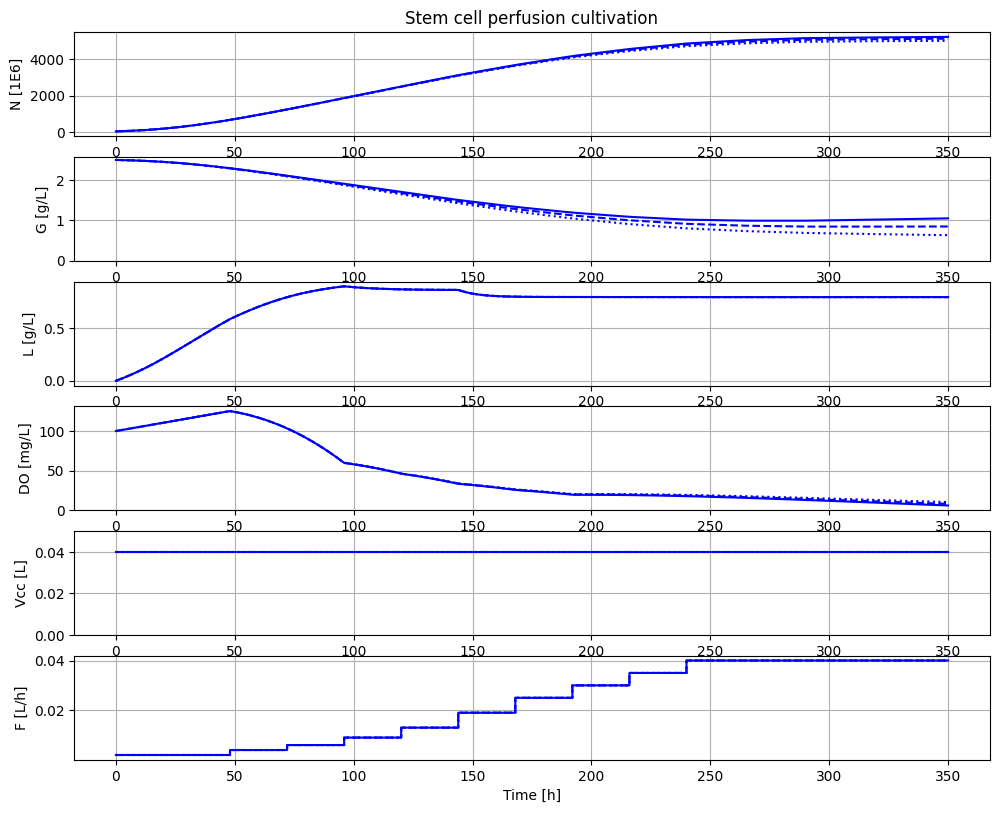

In [ ]:
# Process parameters to mimic stem cell example
# - study impact of different values maintenatnce qm

newplot(plotType='Basic')
for value in [1.0e-6, 10.0e-6, 20e-6]:
    par(qm=value)
    simu(350)

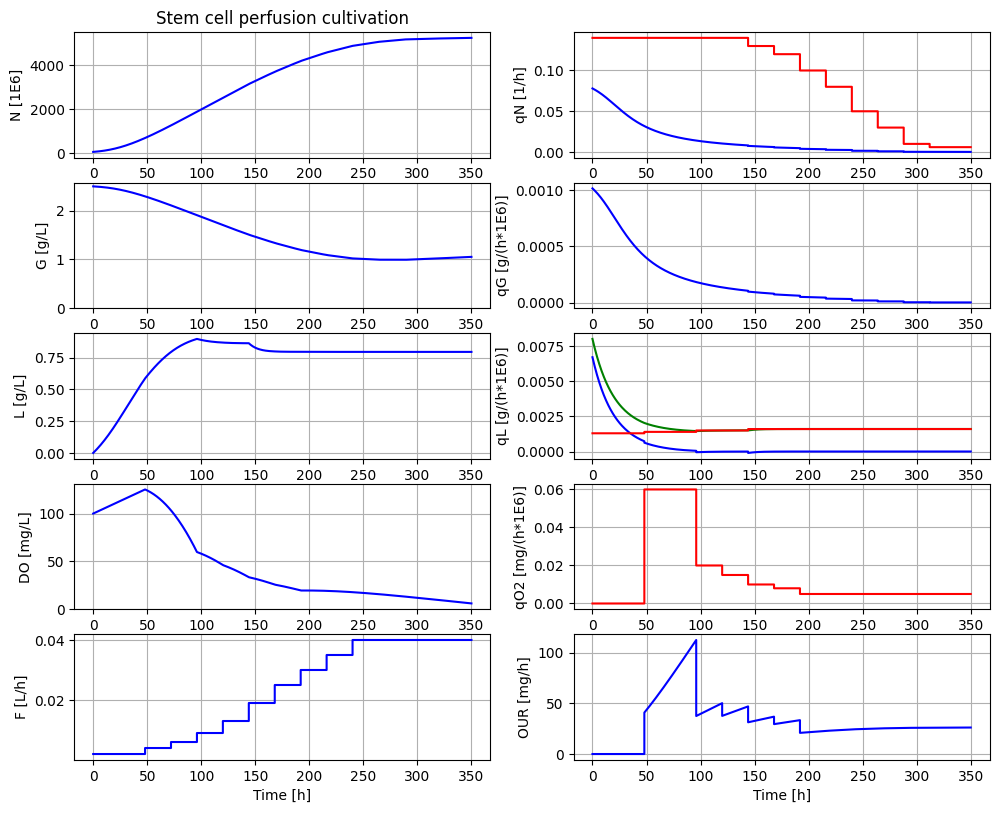

In [ ]:
# Process parameters to mimic stem cell example
# . comprehensvie plot including metabolic rates

par(qm=1e-6)

newplot(plotType='Comprehensive')
simu(350)

In [ ]:
describe('culture')

Reactor culture human-induced pluripotent stem cells - hiPSCs


In [ ]:
describe('Vcc')

Volume of the reactor : 0.04 [ L ]


In [ ]:
describe('N_start')

Number of cells at start : 50.0 [ 1E6 ]


In [ ]:
describe('N')

Number of cells : 5223.752 [ 1E6 ]


In [ ]:
describe('G_start')

Glucose conc at start : 2.5 [ g/L ]


In [ ]:
describe('G_in')

Glucose feed conc : 2.5 [ g/L ]


In [ ]:
describe('L')

Lactate conc : 0.796 [ g/L ]


In [ ]:
describe('DO')

Dissolved oxygen conc : 6.044 [ mg/L ]


## Appendix

In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -PyFMI: 2.14.0
 -FMU by: OpenModelica Compiler OpenModelica 1.23.1
 -FMI: 2.0
 -Type: FMUModelME2
 -Name: BPL_STEM.Reactor
 -Generated: 2024-09-06T19:04:53Z
 -MSL: 3.2.3
 -Description: BPL - not used
 -Interaction: FMU-explore version 1.0.0
